In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import preprocessor as p

import time

# import python helper functions
from helpers import *

# metrics
from sklearn.metrics import classification_report, confusion_matrix

seed = 42

# Load data

In [3]:
directory = "F:\Ingenieur_IA\P7_sentiment_analysis"
data = pd.read_csv("../data/tweets.csv", delimiter=",", encoding = "ISO-8859-1", header=None)

In [4]:
data = data[[0, 5]]
data = data.rename(columns={0: "target", 5: "tweet"})
data.target = data.target.map({0:0, 4:1})
data["clean_tweet"] = data.tweet.apply(lambda t: p.clean(t))

In [5]:
sample_df = pd.DataFrame()

for target in [0,1]:
    target_df = data[data["target"] == target].sample(20000, random_state=42)
    sample_df = sample_df.append(target_df, ignore_index=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6576\2988626695.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_df = sample_df.append(target_df, ignore_index=True)


## Logistic Regression with TF-IDF vectorizer

### 40,000 tweets

In [7]:
X = sample_df["clean_tweet"]
y = np.array(sample_df["target"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

print("Splitting done.")
print("Shape of training set: " + str(X_train.shape))
print("Shape of test shape: " + str(X_test.shape))
print("Count of training target values: " + str(np.unique(y_train, return_counts=True)))
print("Count of test target values: " + str(np.unique(y_test, return_counts=True)))

Splitting done.
Shape of training set: (28000,)
Shape of test shape: (12000,)
Count of training target values: (array([0, 1], dtype=int64), array([14003, 13997], dtype=int64))
Count of test target values: (array([0, 1], dtype=int64), array([5997, 6003], dtype=int64))


Time to train vectorizer and transform training text: 2.98s
Model evaluation:
              precision    recall  f1-score   support

           0       0.75      0.74      0.74      5997
           1       0.74      0.75      0.75      6003

    accuracy                           0.75     12000
   macro avg       0.75      0.75      0.75     12000
weighted avg       0.75      0.75      0.75     12000



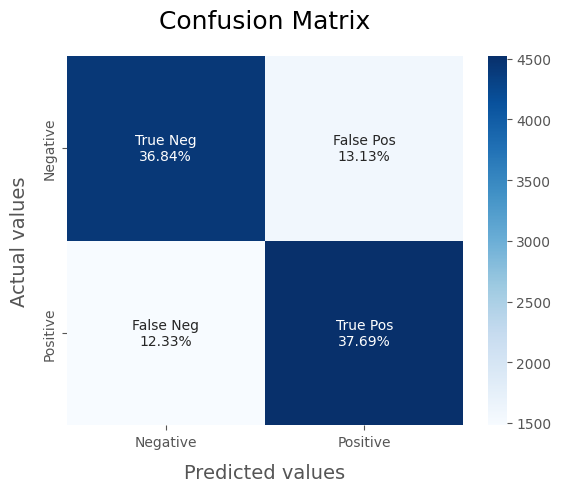

In [8]:
classification_model = LogisticRegression(max_iter=1000, n_jobs=-1)
tfidfconverter = TfidfVectorizer(max_features=1000, min_df=5, max_df=0.7, ngram_range=(1,2))

tfidfconverter.fit(X_train)

start = time.time()

X_train = tfidfconverter.transform(X_train)
X_test = tfidfconverter.transform(X_test)

classification_model.fit(X_train, y_train)

end = time.time()

predictions = classification_model.predict(X_test)

print('Time to train vectorizer and transform training text: %0.2fs' % (end - start))
print('Model evaluation:')
model_Evaluate(classification_model, X_test, y_test)

### 1,600,000 tweets

In [9]:
X = data["clean_tweet"]
y = np.array(data["target"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

print("Splitting done.")
print("Shape of training set: " + str(X_train.shape))
print("Shape of test shape: " + str(X_test.shape))
print("Count of training target values: " + str(np.unique(y_train, return_counts=True)))
print("Count of test target values: " + str(np.unique(y_test, return_counts=True)))

Splitting done.
Shape of training set: (1120000,)
Shape of test shape: (480000,)
Count of training target values: (array([0, 1], dtype=int64), array([560639, 559361], dtype=int64))
Count of test target values: (array([0, 1], dtype=int64), array([239361, 240639], dtype=int64))


Time to train vectorizer and transform training text: 97.58s
Model evaluation:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78    239361
           1       0.78      0.80      0.79    240639

    accuracy                           0.79    480000
   macro avg       0.79      0.79      0.79    480000
weighted avg       0.79      0.79      0.79    480000



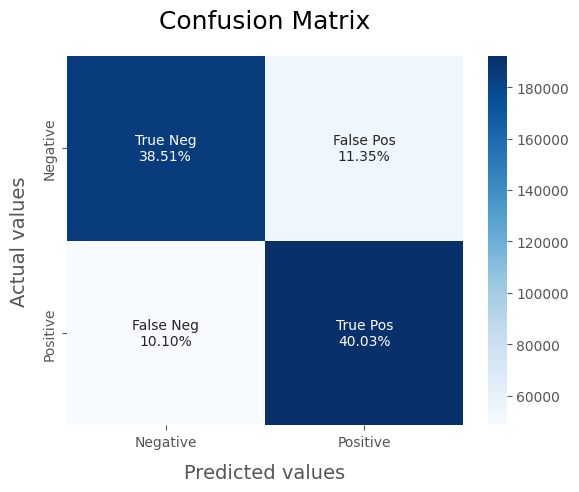

In [10]:
classification_model = LogisticRegression(max_iter=1000, n_jobs=-1)
tfidfconverter = TfidfVectorizer(max_features=3000, min_df=5, max_df=0.7, ngram_range=(1,2))

tfidfconverter.fit(X_train)

start = time.time()

X_train = tfidfconverter.transform(X_train)
X_test = tfidfconverter.transform(X_test)

classification_model.fit(X_train, y_train)

end = time.time()

predictions = classification_model.predict(X_test)

print('Time to train vectorizer and transform training text: %0.2fs' % (end - start))
print('Model evaluation:')
model_Evaluate(classification_model, X_test, y_test)